## **Objective **
### Social Media Tweet Exploratory Data Analysis (EDA) on Twitter Dataset



## Data Understanding
### Loading necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/Tuesday/cleaned_fintech_data.csv 



In [88]:
#To read csv file and create dataframe
tweets = pd.read_csv('processed_tweet_data.csv')
tweets.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Wed Aug 03 20:19:13 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"{'text': 'Pelosi', 'indices': [0, 7]}","{'screen_name': 'flightradar24', 'name': 'Flig...",Algérie
1,Tue Aug 02 15:24:42 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"{'text': 'Taiwan', 'indices': [34, 41]}","{'screen_name': 'renoomokri', 'name': 'Reno Om...",NaN
2,Tue Aug 02 15:02:35 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"{'text': 'NATO', 'indices': [189, 194]}","{'screen_name': 'PeterObi', 'name': 'Peter Obi...",Algérie
3,Mon Aug 01 13:51:42 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"{'text': '5G', 'indices': [197, 200]}","{'screen_name': 'BBCWorld', 'name': 'BBC News ...",Chlef
4,Sun Jul 31 20:02:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"{'text': 'Pelosi', 'indices': [149, 156]}","{'screen_name': 'SpeakerPelosi', 'name': 'Nanc...",Algérie


In [89]:
#To get information abou the data
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19011 entries, 0 to 19010
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          19011 non-null  object 
 1   source              19011 non-null  object 
 2   original_text       19011 non-null  object 
 3   polarity            19011 non-null  float64
 4   subjectivity        19011 non-null  float64
 5   lang                19011 non-null  object 
 6   favorite_count      19011 non-null  int64  
 7   retweet_count       19011 non-null  int64  
 8   original_author     19011 non-null  object 
 9   followers_count     19011 non-null  int64  
 10  friends_count       19011 non-null  int64  
 11  possibly_sensitive  14869 non-null  object 
 12  hashtags            19011 non-null  object 
 13  user_mentions       19011 non-null  object 
 14  place               18658 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 1.5+

#### Check if there are errors in the data

In [90]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columns having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 4495
Columns having columns value:Index(['possibly_sensitive', 'place'], dtype='object')


### Data Preparation 

*   Making correction 
*   Reformatting
*   Combining Dataset




In [91]:
tweets.columns

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place'],
      dtype='object')

In [92]:
tweets['hashtags']

0                 {'text': 'Pelosi', 'indices': [0, 7]}
1               {'text': 'Taiwan', 'indices': [34, 41]}
2               {'text': 'NATO', 'indices': [189, 194]}
3                 {'text': '5G', 'indices': [197, 200]}
4             {'text': 'Pelosi', 'indices': [149, 156]}
                              ...                      
19006      {'text': 'channelstv', 'indices': [93, 104]}
19007    {'text': 'femiadebayo', 'indices': [105, 117]}
19008          {'text': 'osupa', 'indices': [118, 124]}
19009      {'text': 'lizbenson', 'indices': [125, 135]}
19010       {'text': 'zackorji', 'indices': [136, 145]}
Name: hashtags, Length: 19011, dtype: object

In [93]:
type(tweets["original_text"])

pandas.core.series.Series

In [94]:
tweets_df = pd.DataFrame(columns=['text'])
tweets_df['text'] = tweets['original_text'].to_list()
tweets_df['text'] = str(tweets_df['text'])

In [95]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,text
0,0 #Pelosi airplane landed safely in #Ta...
1,0 #Pelosi airplane landed safely in #Ta...
2,0 #Pelosi airplane landed safely in #Ta...
3,0 #Pelosi airplane landed safely in #Ta...
4,0 #Pelosi airplane landed safely in #Ta...
...,...
19006,0 #Pelosi airplane landed safely in #Ta...
19007,0 #Pelosi airplane landed safely in #Ta...
19008,0 #Pelosi airplane landed safely in #Ta...
19009,0 #Pelosi airplane landed safely in #Ta...


### uni-variate Analysis on Hashtags

In [96]:
re.findall?

Signature: re.findall(pattern, string, flags=0)
Docstring:
Return a list of all non-overlapping matches in the string.

If one or more capturing groups are present in the pattern, return
a list of groups; this will be a list of tuples if the pattern
has more than one group.

Empty matches are included in the result.
File:      c:\users\kamuzinzi n. egide\appdata\local\programs\python\python38-32\lib\re.py
Type:      function


In [97]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [98]:
# tweets_df['text']
tweets_df['text'] = str(tweets_df['text'])

In [100]:
tweets_df.columns

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place'],
      dtype='object')

In [101]:
# update Hashtag column with hashtags extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.text.apply(find_hashtags)
# tweets_df['hashtags'] = find_hashtags(tweets_df['text'])
# print(tweets_df['hashtags'])

In [102]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [103]:
hashtags_list_df

,hashtags
0,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
1,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
2,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
3,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
4,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
...,...
19006,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
19007,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
19008,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."
19009,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe..."


In [105]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [106]:
flattened_hashtags_df

,hashtag
0,#Pelosi
1,#Ta
2,#Pelosi
3,#Ta
4,#Pelosi
...,...
380215,#Ta
380216,#Pelosi
380217,#Ta
380218,#Pelosi


In [107]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [108]:
tweets_df

,text,hashtags,flattened_hashtags
0,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Pelosi
1,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Ta
2,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Pelosi
3,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Ta
4,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Pelosi
...,...,...,...
19006,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Pelosi
19007,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Ta
19008,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Pelosi
19009,0 0 #Pelosi airplane landed safe...,"[#Pelosi, #Ta, #Pelosi, #Ta, #Pelosi, #Ta, #Pe...",#Ta


<AxesSubplot:>

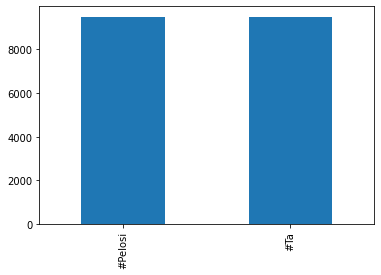

In [79]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')


### Analyzing data using language attribute

In [130]:
tweets

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Wed Aug 03 20:19:13 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"{'text': 'Pelosi', 'indices': [0, 7]}","{'screen_name': 'flightradar24', 'name': 'Flig...",Algérie
1,Tue Aug 02 15:24:42 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"{'text': 'Taiwan', 'indices': [34, 41]}","{'screen_name': 'renoomokri', 'name': 'Reno Om...",NaN
2,Tue Aug 02 15:02:35 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"{'text': 'NATO', 'indices': [189, 194]}","{'screen_name': 'PeterObi', 'name': 'Peter Obi...",Algérie
3,Mon Aug 01 13:51:42 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"{'text': '5G', 'indices': [197, 200]}","{'screen_name': 'BBCWorld', 'name': 'BBC News ...",Chlef
4,Sun Jul 31 20:02:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"{'text': 'Pelosi', 'indices': [149, 156]}","{'screen_name': 'SpeakerPelosi', 'name': 'Nanc...",Algérie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19006,Tue Aug 02 14:09:25 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",It's good to be proud of the source that pays ...,0.750000,0.800000,en,2,0,itodougo,359,639,False,"{'text': 'channelstv', 'indices': [93, 104]}","{'screen_name': 'SecBlinken', 'name': 'Secreta...",Nigeria
19007,Tue Aug 02 14:08:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",She really wants to create wwIII\n#nancy\n#Pel...,0.200000,0.100000,en,1,1,AuwalFaruq1,75,429,NaN,"{'text': 'femiadebayo', 'indices': [105, 117]}","{'screen_name': 'disclosetv', 'name': 'Disclos...",AREWA
19008,Tue Aug 02 13:56:40 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",I can’t believe my eyes 😳💔 \n\n#Machala #Pelos...,0.000000,0.000000,en,1,0,bryteazy,102,140,False,"{'text': 'osupa', 'indices': [118, 124]}","{'screen_name': 'raffpantucci', 'name': 'Raffa...",Nigeria
19009,Tue Aug 02 13:49:50 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","Get Me To 2k, Retweet And Follow Me 🙏🏾 #Pelosi...",0.000000,0.000000,en,2,0,UghelliSon1,1460,1072,NaN,"{'text': 'lizbenson', 'indices': [125, 135]}","{'screen_name': 'Kamran_Yousaf', 'name': 'Kamr...","Ibadan, Nigeria"


In [124]:
#ploting Tweets by language 
tweets_lang = pd.DataFrame(columns=['text','lang'])

# tweets['text'] =  tweets_df['clean_text'].to_list()
tweets_lang['text'] =  tweets['original_text'].to_list()

tweets_lang['lang'] = tweets['lang'].to_list()

tweets_by_lang = tweets_lang['lang'].value_counts()

In [133]:
# tweets_lang
tweets["original_text"].head()

0    #Pelosi airplane landed safely in #Taiwan 🇹🇼  ...
1    Watch the video of the beginning of the Chines...
2    #Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...
3    #HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...
4    #Pelosi\n#china\nChina Time ✌️ https://t.co/tE...
Name: original_text, dtype: object

<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

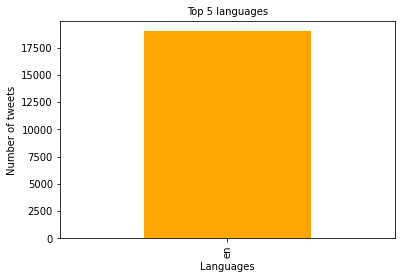

In [126]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')

In [139]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets.loc[tweets_lang['lang'] =="en"]

In [140]:
English_tweets

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Wed Aug 03 20:19:13 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"{'text': 'Pelosi', 'indices': [0, 7]}","{'screen_name': 'flightradar24', 'name': 'Flig...",Algérie
1,Tue Aug 02 15:24:42 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"{'text': 'Taiwan', 'indices': [34, 41]}","{'screen_name': 'renoomokri', 'name': 'Reno Om...",NaN
2,Tue Aug 02 15:02:35 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"{'text': 'NATO', 'indices': [189, 194]}","{'screen_name': 'PeterObi', 'name': 'Peter Obi...",Algérie
3,Mon Aug 01 13:51:42 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"{'text': '5G', 'indices': [197, 200]}","{'screen_name': 'BBCWorld', 'name': 'BBC News ...",Chlef
4,Sun Jul 31 20:02:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"{'text': 'Pelosi', 'indices': [149, 156]}","{'screen_name': 'SpeakerPelosi', 'name': 'Nanc...",Algérie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19006,Tue Aug 02 14:09:25 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",It's good to be proud of the source that pays ...,0.750000,0.800000,en,2,0,itodougo,359,639,False,"{'text': 'channelstv', 'indices': [93, 104]}","{'screen_name': 'SecBlinken', 'name': 'Secreta...",Nigeria
19007,Tue Aug 02 14:08:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",She really wants to create wwIII\n#nancy\n#Pel...,0.200000,0.100000,en,1,1,AuwalFaruq1,75,429,NaN,"{'text': 'femiadebayo', 'indices': [105, 117]}","{'screen_name': 'disclosetv', 'name': 'Disclos...",AREWA
19008,Tue Aug 02 13:56:40 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",I can’t believe my eyes 😳💔 \n\n#Machala #Pelos...,0.000000,0.000000,en,1,0,bryteazy,102,140,False,"{'text': 'osupa', 'indices': [118, 124]}","{'screen_name': 'raffpantucci', 'name': 'Raffa...",Nigeria
19009,Tue Aug 02 13:49:50 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","Get Me To 2k, Retweet And Follow Me 🙏🏾 #Pelosi...",0.000000,0.000000,en,2,0,UghelliSon1,1460,1072,NaN,"{'text': 'lizbenson', 'indices': [125, 135]}","{'screen_name': 'Kamran_Yousaf', 'name': 'Kamr...","Ibadan, Nigeria"


###Text Preprocessing

In [143]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['original_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


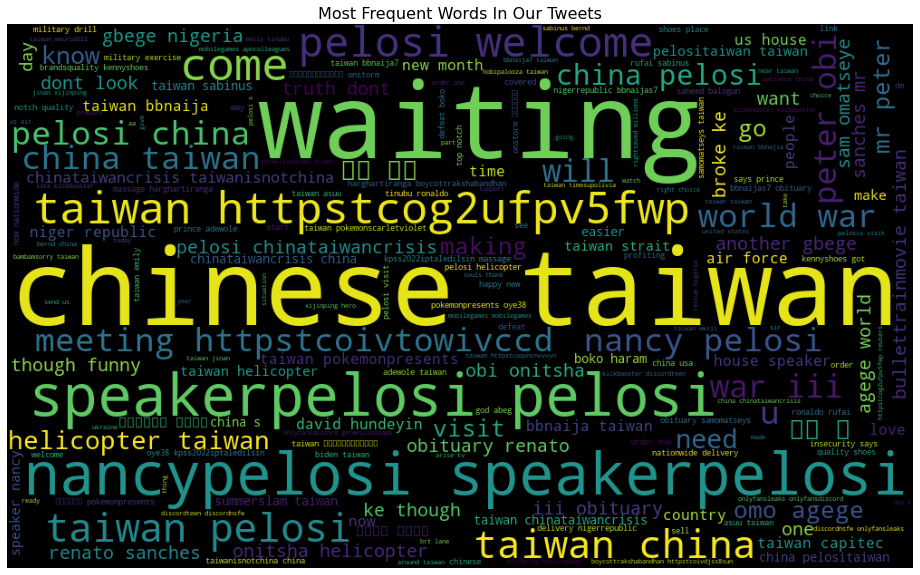

In [144]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

## **Assignment 2 for Practice** 
Add additional Exploratory analysis function to 

*   Find top 10 mentioned names.



Here we cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.
A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a tweets/document.

This can be done by assigning each word a unique number. Then any tweet we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

In [ ]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['clean_text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['giving',
  'forth',
  'life',
  'becoming',
  'burden',
  'kenya',
  'this',
  'mother',
  'gave',
  'birth',
  'babies',
  'hard',
  'time',
  'meeting',
  'nutritional',
  'needs',
  'coz',
  'baby',
  'formula',
  'expensiveturn',
  'bundles',
  'tears',
  'joy',
  'giving',
  'handmpesa',
  'douglas',
  'nyaoko'],
 ['today',
  'world',
  'day',
  'combat',
  'restoring',
  'degraded',
  'land',
  'brings',
  'jobs',
  'food',
  'security',
  'helps',
  'recover',
  'slows',
  'locking',
  'away',
  'carbon',
  'all',
  'critical',
  'lifting',
  'many',
  'poverty']]

In [ ]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

0 ........ babies
1 ........ baby
2 ........ becoming
3 ........ birth
4 ........ bundles
5 ........ burden
6 ........ coz
7 ........ douglas
8 ........ expensiveturn
9 ........ formula
10 ........ forth
11 ........ gave
12 ........ giving
13 ........ handmpesa
14 ........ hard
15 ........ joy
16 ........ kenya
17 ........ life
18 ........ meeting
19 ........ mother
20 ........ needs
21 ........ nutritional
22 ........ nyaoko
23 ........ tears
24 ........ this
25 ........ time
26 ........ all
27 ........ away
28 ........ brings
29 ........ carbon
30 ........ combat
31 ........ critical
32 ........ day
33 ........ degraded
34 ........ food
35 ........ helps
36 ........ jobs
37 ........ land
38 ........ lifting
39 ........ locking
40 ........ many
41 ........ poverty
42 ........ recover
43 ........ restoring
44 ........ security
45 ........ slows
46 ........ today
47 ........ world
48 ........ confident
49 ........ delivered
50 ........ emissions
51 ........ g7
52 ........ hearing
53 ...

In [ ]:
corpus_1[:2] = [word_to_id.doc2bow(tweet) for tweet in word_list]

In [ ]:
corpus_1[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)]]

### Modeling